# MLP main notebok

## Libs

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import numpy as np

import matplotlib.pyplot as plt

## Load and Split data

In [29]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## SKlearn implementation

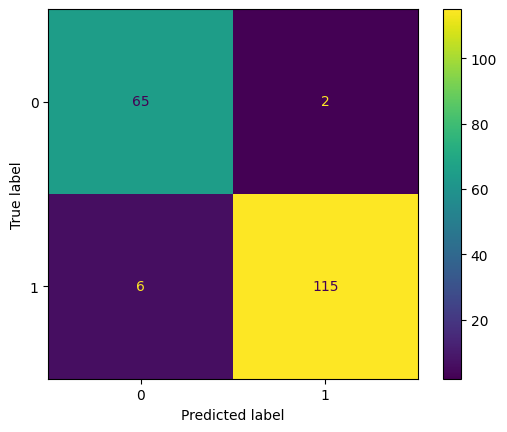

In [30]:
skl_mlp = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
y_pred = skl_mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        67
           1       0.98      0.95      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188



## Implementation from scratch

In [32]:
class MLP:
    '''
    Our Multi-layer Perceptron classifier simplified implementation
    
    Attributes
    ----------
    x: numpy array
        Input data
    y: numpy array
        Output data
    hidden: int, default=100
        number of neurons in the hidden layer
    output: int, default=2
        number of neurons in the output layer
    '''
    def __init__(self, x, y, hidden=100, output=2):
        np.random.seed(42)
        self.x = x
        self.y = y
        self.hidden = hidden
        self.output = output
        self.input = self.x.shape[1]

        # Initialization for bias and weights
        self.w1 = np.random.rand(self.input, self.hidden) / np.sqrt(self.input)
        self.b1 = np.zeros((1, self.hidden))
        self.w2 = np.random.rand(self.hidden, self.output) / np.sqrt(self.hidden)
        self.b2 = np.zeros((1, self.output))
        self.wb_dict = {'w1': self.w1, 'b1': self.b1, 'w2': self.w2, 'b2': self.b2}
        
        self.z1 = 0
        self.f1 = 0

    def feed_forward(self,x):
        # Equation of the line 1
        self.z1 = x.dot(self.w1) + self.b1
        
        #Activation function 1 (Hyperbolic tangent)
        self.f1 = np.tanh(self.z1)
        
        # Equation of the line 2
        z2 = self.f1.dot(self.w2) + self.b2
        
        # Activation function 2 (Hyperbolic tangent)
        f2 = np.tanh(z2)
        
        # Softmax function
        exponential_values = np.exp(f2)
        softmax = exponential_values / np.sum(exponential_values, axis=1, keepdims=True)
        return softmax
    
    def loss(self, softmax):
        # Cross Entropy
        log_probabilities = -np.log(softmax[np.arange(len(self.y)), self.y])
        return np.mean(log_probabilities)
        
    
    def back_propagation(self):
        pass

    def fit(self):
        pass

In [34]:
our_mlp = MLP(X_train, y_train)
softmax = our_mlp.feed_forward(X_train)
loss_value = our_mlp.loss(softmax)
print(loss_value)

0.0018192980108081842
